In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import load_2D_dataset
from utils.l_layer_application_utils import *

In [24]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [2]:
def model(x,y,learning_rate = 0.02, iterations = 40000, initialization = "he", print_cost = True, l2_reg = True, lambdaa= 10e-4, keep_prob = 0.9):
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20,3,1]
    if initialization == "random":
        parameters = initialize_parameters_type(layer_dims , "random")
    elif initialization == "zeros":
        parameters = initialize_parameters_type(layer_dims , "zeros")
    else:
        parameters = initialize_parameters_type(layer_dims ,"he")
    for i in range(iterations):
        AL, cache = forward(x,parameters, keep_prob)
        grads = L_model_backward(AL,y, cache, l2_reg = l2_reg, lambd_ = lambdaa, keep_prob = keep_prob)
        parameters = update_params(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            cost = compute_cost(AL,y, l2_reg = l2_reg, lambd_ = lambdaa, params = parameters,)
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

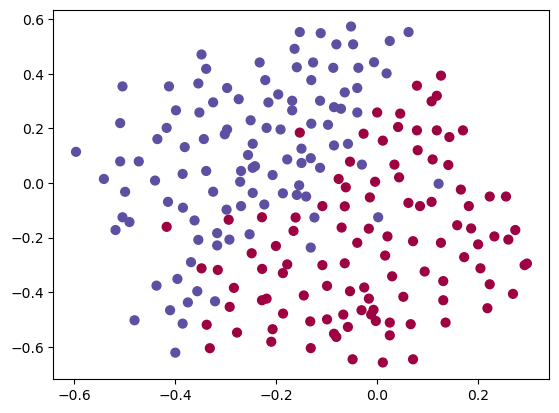

In [3]:
train_x, train_y, test_x, test_y = load_2D_dataset()

Cost after iteration 0: 0.7396874186723678
Cost after iteration 1000: 0.22474148003440494
Cost after iteration 2000: 0.20362068411157616
Cost after iteration 3000: 0.19102659125147234
Cost after iteration 4000: 0.1852152612488696
Cost after iteration 5000: 0.17831463902826017
Cost after iteration 6000: 0.18781358608968726
Cost after iteration 7000: 0.17108480903965678
Cost after iteration 8000: 0.17381916797833274
Cost after iteration 9000: 0.19079646287998017


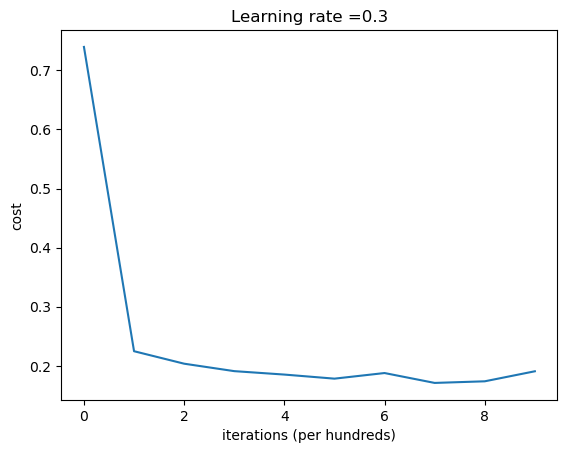

In [40]:
params = model(train_x, train_y,learning_rate = 0.3,iterations = 10000, keep_prob = 1, l2_reg = True,)

In [41]:
y_hat = predict(test_x,params)
accuracy = (1- np.mean(np.abs(y_hat - test_y)))
print(accuracy *100 , "%")

93.5 %


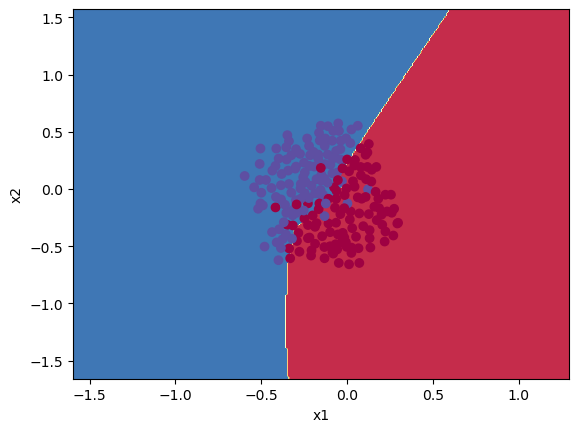

In [42]:
plot_decision_boundary(lambda x: predict(x.T, params), train_x, train_y)